In [42]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from astropy.io import fits
import glob 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20, "xtick.direction": 'in', "ytick.direction": 'in'})
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy import units as u
from astropy.table import Column, Table, join

pd.options.display.max_columns = 999
%matplotlib inline

In [43]:
path = '/Users/daniella/Research/HIPGaia/HTOF/orbit3d/orbit3d/'

In [44]:
#tt = pd.Series(glob.glob('HIP110649_chain000.fits', recursive=True)) #
#labels: [jit, mpri, msec, sau, esino, ecoso, inc, asc, lam]

In [91]:
file = 'HIP3850_chain008.fits'
source = file.split('_')[0]
tt = fits.open(path+file)[0].data
nsteps = 50*tt.shape[1]

### Secondary Mass

(0, 100)

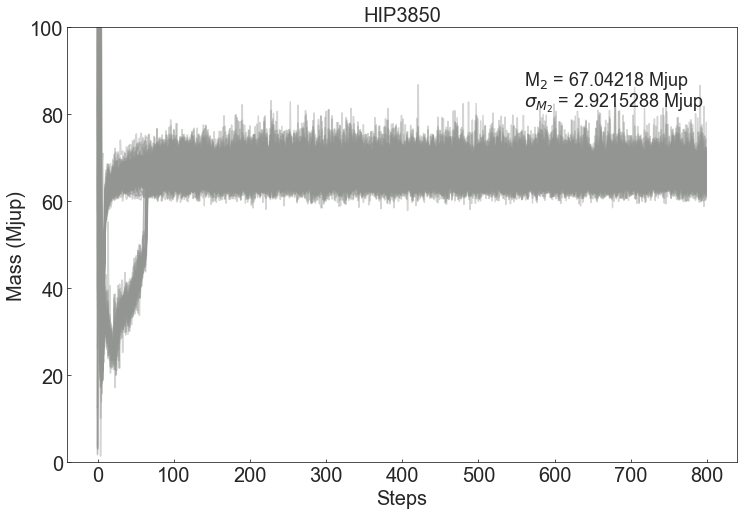

In [143]:
plt.figure(figsize=(12,8))
#plt.plot(tt[:,:,2],c=sns.xkcd_rgb['grey'],alpha=0.2)
for i in range(tt.shape[0]):
    plt.plot(tt[i,:,2]*1989/1.898,c=sns.xkcd_rgb['grey'],alpha=0.4)
plt.title(source,fontsize=20)
plt.xlabel('Steps',fontsize=20)
plt.ylabel('Mass (Mjup)',fontsize=20)
plt.annotate('M$_2$ = '+str(np.mean(tt[i,100:,2]*1989/1.898))+' Mjup',xy=(nsteps/50*0.7,np.max(tt[:,100:,2]*1989/1.898)),fontsize=18)
plt.annotate('$\sigma_{M_{2}}$ = '+str(np.std(tt[i,100:,2]*1989/1.898))+' Mjup',xy=(nsteps/50*0.7,0.94*np.max(tt[:,100:,2]*1989/1.898)),fontsize=18)
plt.ylim(0,100)

### Separation

Text(600,12.9844,'$\\sigma_a$ = 0.44668892 AU')

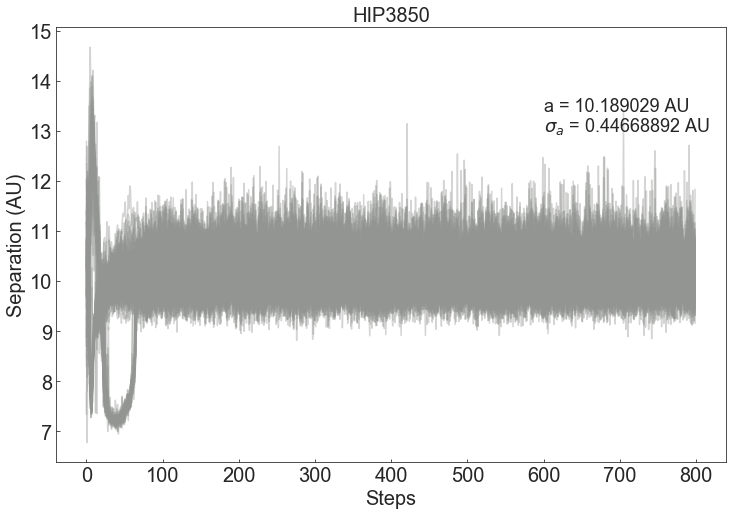

In [144]:
plt.figure(figsize=(12,8))
for i in range(tt.shape[0]):
    plt.plot(tt[i,:,3],c=sns.xkcd_rgb['grey'],alpha=0.4)
plt.title(source,fontsize=20)
plt.xlabel('Steps',fontsize=20)
plt.ylabel('Separation (AU)',fontsize=20)
plt.annotate('a = '+str(np.mean(tt[i,100:,3]))+' AU',xy=(nsteps/50*0.75,np.max(tt[:,100:,3])),fontsize=18)
plt.annotate('$\sigma_a$ = '+str(np.std(tt[i,100:,3]))+' AU',xy=(nsteps/50*0.75,0.97*np.max(tt[:,100:,3])),fontsize=18)

### Eccentricity

Text(640,0.799517,'$\\sigma_e$ = 0.0030392462')

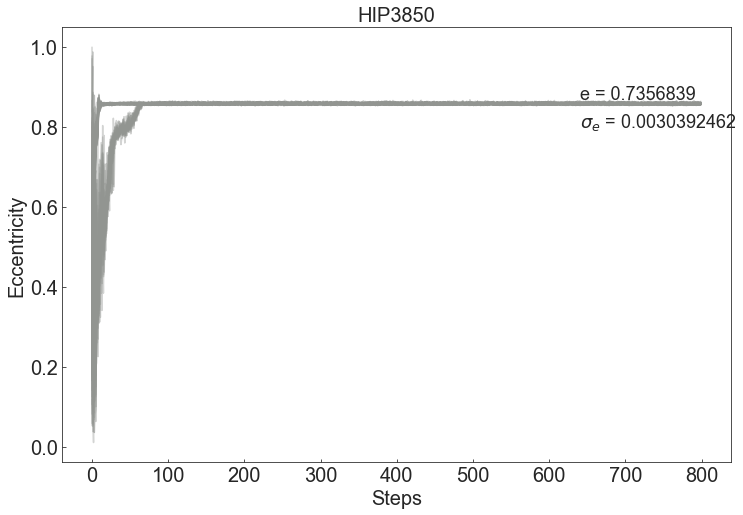

In [145]:
plt.figure(figsize=(12,8))
for i in range(tt.shape[0]):
    plt.plot(np.sqrt(tt[i,:,4]**2 + tt[i,:,5]**2),c=sns.xkcd_rgb['grey'],alpha=0.4)
plt.title(source,fontsize=20)
plt.xlabel('Steps',fontsize=20)
plt.ylabel('Eccentricity',fontsize=20)
plt.annotate('e = '+str(np.mean(tt[i,100:,4]**2 + tt[i,100:,5]**2)),xy=(nsteps/50*0.8,np.max(np.sqrt(tt[:,100:,4]**2 + tt[:,100:,5]**2))),fontsize=18)
plt.annotate('$\sigma_e$ = '+str(np.std(tt[i,100:,4]**2 + tt[i,100:,5]**2)),xy=(nsteps/50*0.8,0.92*np.max(np.sqrt(tt[:,100:,4]**2 + tt[:,100:,5]**2))),fontsize=18)

### Inclination

(0, 90)

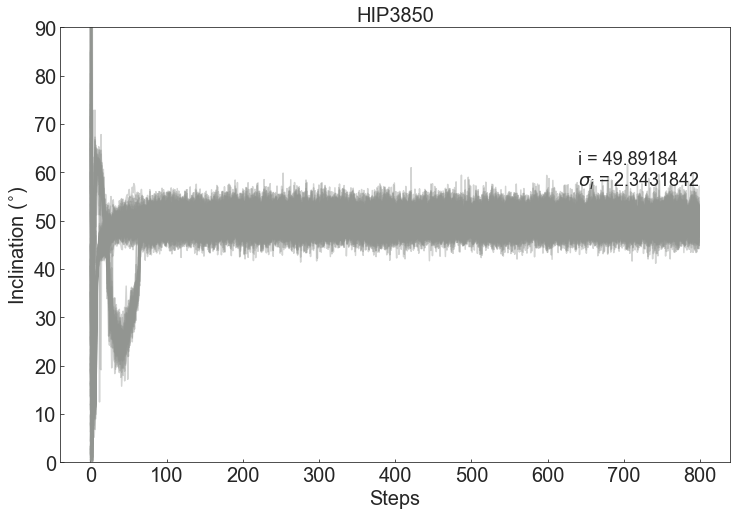

In [148]:
plt.figure(figsize=(12,8))
for i in range(tt.shape[0]):
    plt.plot(tt[i,:,6]*180/np.pi,c=sns.xkcd_rgb['grey'],alpha=0.4)
plt.title(source,fontsize=20)
plt.xlabel('Steps',fontsize=20)
plt.ylabel('Inclination ($^{\circ}$)',fontsize=20)
plt.annotate('i = '+str(np.mean(tt[i,100:,6]*180/np.pi)),xy=(nsteps/50*0.8,np.max(tt[:,100:,6]*180/np.pi)),fontsize=18)
plt.annotate('$\sigma_i$ = '+str(np.std(tt[i,100:,6]*180/np.pi)),xy=(nsteps/50*0.8,0.93*np.max(tt[:,100:,6]*180/np.pi)),fontsize=18)
plt.ylim(0,90)

### RV Jitter

Text(640,1.67106,'0.112312')

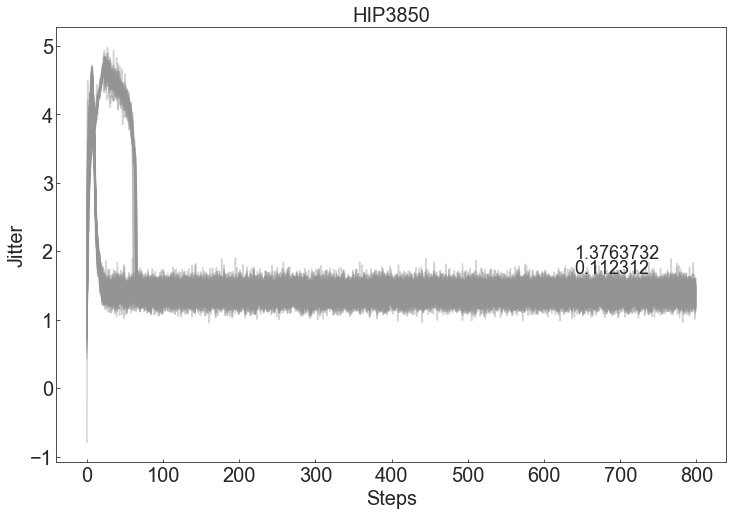

In [152]:
plt.figure(figsize=(12,8))
for i in range(tt.shape[0]):
    plt.plot(tt[i,:,0],c=sns.xkcd_rgb['grey'],alpha=0.4)
plt.title(source,fontsize=20)
plt.xlabel('Steps',fontsize=20)
plt.ylabel('Jitter',fontsize=20)
plt.annotate(str(np.mean(tt[i,100:,0])),xy=(nsteps/50*0.8,np.max(tt[:,100:,0])),fontsize=18)
plt.annotate(str(np.std(tt[i,100:,0])),xy=(nsteps/50*0.8,0.88*np.max(tt[:,100:,0])),fontsize=18)